In [167]:
import numpy as np
import util
import matplotlib.pyplot as plt


class GDA:
    """Gaussian Discriminant Analysis.

    Example usage:
        > clf = GDA()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """
    def __init__(self, step_size=0.01, max_iter=10000, eps=1e-5,
                 theta_0=None, verbose=True):
        """
        Args:
            step_size: Step size for iterative solvers only.
            max_iter: Maximum number of iterations for the solver.
            eps: Threshold for determining convergence.
            theta_0: Initial guess for theta. If None, use the zero vector.
            verbose: Print loss values during training.
        """
        self.theta = theta_0
        self.step_size = step_size
        self.max_iter = max_iter
        self.eps = eps
        self.verbose = verbose
        self.bias = None
        self.d = 2.  # default dimension for x
        
    def calc_phi(self, y, n):
        count = 0
        for yi in y:
            if yi == 1: 
                count += 1
        
        return count / n
    
    def rx(self, x):
        """Reshape x"""
        return np.array(x).reshape(self.d, 1)
    
    def calc_mu_0(self, x, y, n):
        x_sum = np.zeros((self.d, 1))
        y_count = 0
        for i in range(n):
            if y[i] == 0:
                xi = self.rx(x[i])
                x_sum = np.add(x_sum, xi)
                y_count += 1
        
        return np.divide(x_sum, y_count)
    
    def calc_mu_1(self, x, y, n):
        x_sum = np.zeros((self.d, 1))
        y_count = 0
        for i in range(n):
            if y[i] == 1:
                xi = self.rx(x[i])
                x_sum = np.add(x_sum, xi)
                y_count += 1
        
        return np.divide(x_sum, y_count)

    def calc_sigma(self, x, y, n, mu_0, mu_1):
        sigma = np.zeros((self.d, self.d)) #  d x d
        for i in range(n):
            if y[i] == 0:
                xi = self.rx(x[i])
                sigma = np.add(sigma, np.dot(np.subtract(xi, mu_0), np.subtract(xi, mu_0).T))
            elif y[i] == 1:
                xi = self.rx(x[i])
                sigma = np.add(sigma, np.dot(np.subtract(xi, mu_1), np.subtract(xi, mu_1).T))
            
        return np.divide(sigma, n)
            
                               
#     def calc_theta(self, mu_0, mu_1, sigma, phi):
#         sigma_inv = np.linalg.inv(sigma)
#         theta_0 = np.dot(np.dot(mu_1.T, sigma_inv), mu_1) - 0.5*np.dot(np.dot(mu_1.T, sigma_inv), mu_1) - np.log((phi)/ (1-phi)) 
#         theta_x = np.dot(sigma_inv, np.subtract(mu_1, mu_0))
# #         theta_x = np.multiply(np.subtract(np.dot(mu_1.T, sigma_inv), np.dot(mu_0.T, sigma_inv)), 2)
#         self.theta = theta_x
#         self.bias = theta_0
#         print(self.theta, self.theta.shape)
#         print(self.bias, self.bias.shape)
                               
            
    def calc_theta(self, mu_0, mu_1, sigma, phi):
        S = np.linalg.inv(sigma)
        self.theta = S.dot(mu_1 - mu_0)
        w1= mu_0.T.dot(S.dot(mu_0))
        w2= mu_1.T.dot(S.dot(mu_1))
        self.bias= [1/2*(w1-w2)[0,0]-np.log((1-phi)/phi)]
        
        
    def sigmoid(self, x):
        return np.divide(1, np.add(1, np.exp(np.negative(x))))
                               
    def fit(self, x, y):
        """Fit a GDA model to training set given by x and y by updating
        self.theta.

        Args:
            x: Training example inputs. Shape (n_examples, dim).
            y: Training example labels. Shape (n_examples,).
        """
        # *** START CODE HERE ***

        # Find phi, mu_0, mu_1, and sigma
        n = len(y)
        self.d = len(x[0])
        phi = self.calc_phi(y, n)
        mu_0 = self.calc_mu_0(x, y, n)       # average of all features for y = 0 label
        mu_1 = self.calc_mu_1(x, y, n)       # average of all features for y = 1 label
        sigma = self.calc_sigma(x, y, n, mu_0, mu_1)
        # Write theta in terms of the parameters
        self.calc_theta(mu_0, mu_1, sigma, phi)
        # *** END CODE HERE ***

    def predict(self, x):
        """Make a prediction given new inputs x.

        Args:
            x: Inputs of shape (n_examples, dim).

        Returns:
            Outputs of shape (n_examples,).
        """
        # *** START CODE HERE ***
        y = []
        for xi in x:
            xi = self.rx(xi)
            z = np.add(np.dot(self.theta.T, xi), self.bias)
#             z = np.dot(self.theta, xi)
            y_prob = self.sigmoid(z)
            y.append(y_prob)
        return y
        # *** END CODE HERE

Error 20.875  %


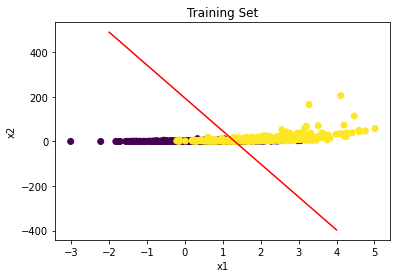

[[1.59905448]
 [0.01081916]] [1.59905448]
Error 19.0  %


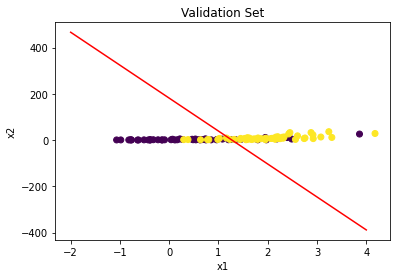

Error 20.5  %


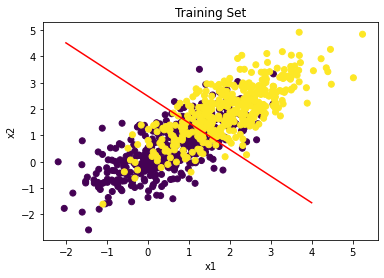

[[0.85879252]
 [0.84927843]] [0.85879252]
Error 11.0  %


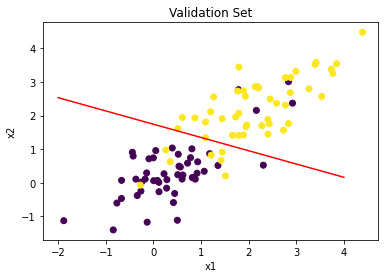

In [168]:
def calculate_logistic_loss(y, h):
    incorrect = 0
    m = len(y)
    for i in range(m):
        y_pred = 0 if h[i][0] <= 0.5 else 1
        if y_pred != y[i]:
            incorrect += 1
    return (incorrect/m)*100
    
def main(train_path, valid_path, save_path):
    """Problem: Gaussian discriminant analysis (GDA)

    Args:
        train_path: Path to CSV file containing dataset for training.
        valid_path: Path to CSV file containing dataset for validation.
        save_path: Path to save predicted probabilities using np.savetxt().
    """
    # Load dataset
    x_train, y_train = util.load_dataset(train_path, add_intercept=False)
   
    # *** START CODE HERE ***
    # Train a GDA classifier
    clf = GDA()
    clf.fit(x_train, y_train)
    """
    predict and find error.
    NOTE: This Loss calculation is not to be reported, 
    its only for illustration purpose. 
    IMPORTANT: only report loss for validation set.
    """
    y_train_probs = clf.predict(x_train)
    train_loss = calculate_logistic_loss(y_train, y_train_probs)
    print("Error", train_loss, " %")
    theta = clf.theta
    theta0 = clf.bias
    a = np.arange(-2, 5)
    b = np.divide(np.subtract(np.negative(theta0), np.multiply(theta[0], a)),theta[1])
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    plt.plot(a, b, 'r-')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Training Set')
    plt.show()
    
    print(theta, theta[0])
        
#     # # Plot decision boundary on validation set
    x_valid, y_valid = util.load_dataset(valid_path, add_intercept=False)
    clf.fit(x_valid, y_valid)
    y_valid_probs = clf.predict(x_valid)
    valid_loss = calculate_logistic_loss(y_valid, y_valid_probs)
    print("Error", valid_loss, " %")
    theta = clf.theta
    theta0 = clf.bias
    a = np.arange(-2, 5)
    b = np.divide(np.subtract(np.negative(theta0), np.multiply(theta[0], a)),theta[1])
    plt.scatter(x_valid[:, 0], x_valid[:, 1], c=y_valid)
    plt.plot(a, b, 'r-')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Validation Set')
    plt.show()
#    
    y_probs = []
    for yi in y_valid_probs:
        y_probs.append(yi[0][0])
    np.savetxt(save_path, np.array(y_probs).reshape(-1,1))

#     # Use np.savetxt to save outputs from validation set to save_path
#     # *** END CODE HERE ***



if __name__ == '__main__':
    main(train_path='../../cs229/ps1/src/linearclass/ds1_train.csv',
         valid_path='../../cs229/ps1/src/linearclass/ds1_valid.csv',
         save_path='../../cs229/ps1/src/linearclass/gda_pred_1.txt')

    main(train_path='../../cs229/ps1/src/linearclass/ds2_train.csv',
         valid_path='../../cs229/ps1/src/linearclass/ds2_valid.csv',
         save_path='../../cs229/ps1/src/linearclass/gda_pred_2.txt')
